In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

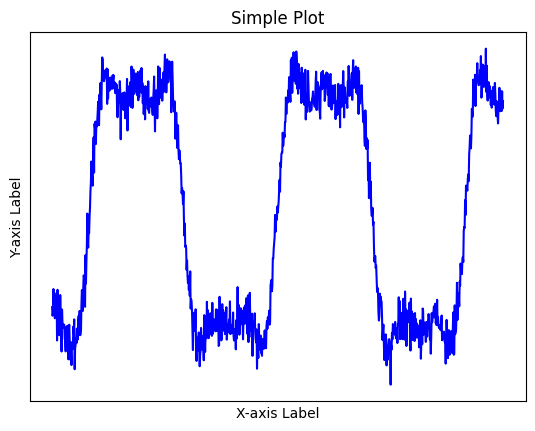

In [2]:
csvfile = open('a3-data\dataset2.txt', 'r')
csvreader1 = csv.reader(csvfile, delimiter = ' ')

x = []
y = []

for row in csvreader1:
    x.append(row[0])
    y.append(row[1])
x = np.asarray(x, 'float64')
y = np.asarray(y, 'float64')

# Create a plot
plt.plot(x, y, color='blue')

# Add labels and a title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Plot')

# Remove x and y ticks
plt.xticks([])  # Remove x ticks
plt.yticks([])  # Remove y ticks

# Show the plot
plt.show()

[-2.5315315315315314, -2.4954954954954953, -1.2582582582582582, -0.033033033033032844, -0.01501501501501501, -0.0030030030030028243, 0.0030030030030028243, 0.009009009009008917, 1.2462462462462458, 1.2522522522522523, 1.258258258258258, 1.2642642642642645, 2.501501501501502]
[-0.17888202764094907, 0.07248855973903644, 0.21425026753970927, -0.23305725331165084, -0.26673038604002436, 0.1055856489623738, -0.14197283332172486, 0.10493787317688441, 0.011933644563926121, -0.26611767912408557, -0.23637122927605064, 0.05397213723524075, -0.24005846426442798]


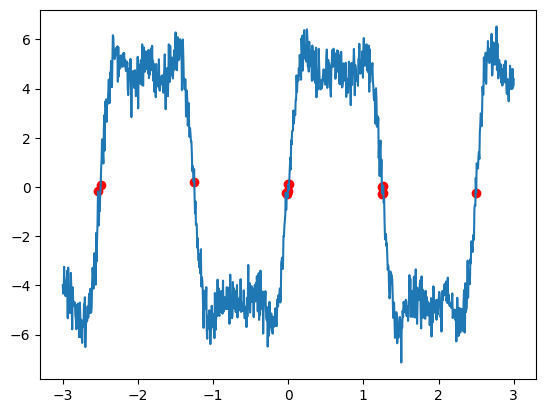

In [3]:
x_for_freq_calc = []
y_for_freq_calc = []
for i in range (len(x)):
    if abs(y[i]) < 0.3:
        x_for_freq_calc.append(x[i])
        y_for_freq_calc.append(y[i])
plt.scatter(x_for_freq_calc, y_for_freq_calc, color = 'red')
plt.plot(x, y)
plt.savefig("Freq_Calc.png")


In [4]:
x_alpha = (x_for_freq_calc[0] + x_for_freq_calc[1]) / 2
x_beta = (x_for_freq_calc[3] + x_for_freq_calc[4]) / 2
T = x_beta - x_alpha
f = 2 * np.pi / T
print(f)

2.4894894894894892
2.4804804804804803
2.5238850510142368


In [5]:
# '''Do least squares also'''
# def model(x, a, b, c, d):
#     return a* np.sin(f * x) + b* np.sin(3*f*x) + c*np.sin(5*f*x) + d
# params, _ = curve_fit (model, x, y)
# a_pred, b_pred, c_pred, d_pred = params
# y_pred = model(x, a_pred, b_pred, c_pred, d_pred)
# plt.plot(x, y)
# plt.plot(x, y_pred, color = "red")


In [6]:
# print(a_pred, b_pred, c_pred, d_pred)

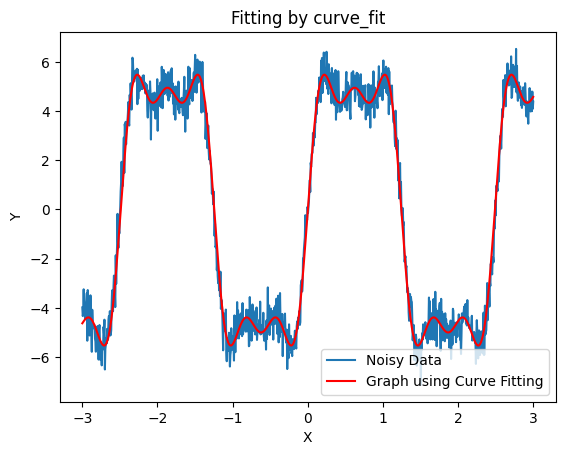

In [21]:
def model (x, a, b, c, d):
    return (a * np.sin (f * x) + b * np.sin (3 * f * x) + c * np.sin (5 * f * x) + d)
params, _ = curve_fit (model, x, y, p0=[1000, 0, 0, 0])
a_pred, b_pred, c_pred, d_pred = params
y_pred = model(x, a_pred, b_pred, c_pred, d_pred)
plt.plot(x, y, label = "Noisy Data")
plt.plot(x, y_pred, color = "red", label = "Graph using Curve Fitting")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Fitting by curve_fit")
plt.show()

 

In [12]:
print (a_pred, b_pred, c_pred, d_pred)

6.010324447122386 2.000062756881624 0.9624455807208944 -0.025875188336279713


In [9]:
print(f)

2.5238850510142368


6.010324446030627 2.0000627561987896 0.9624455798646387 -0.025875188673358196


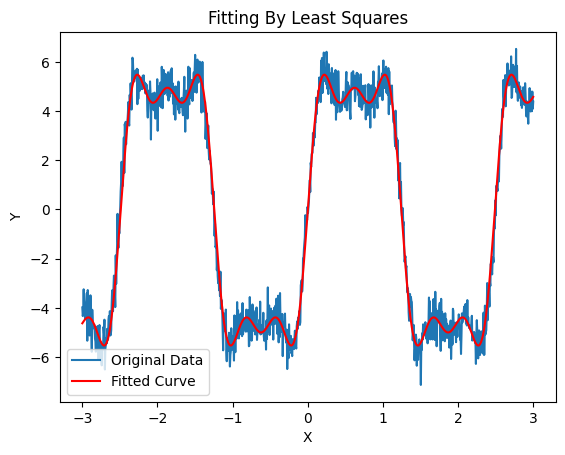

In [17]:
# Create a matrix A with columns for sin(x), sin(3x), sin(5x), and a constant term
A = np.column_stack([np.sin(f * x), np.sin(3 *f * x), np.sin(5 *f* x), np.ones_like(x)])
# Solve the least squares problem to find the amplitudes and constant
params1, _, _, _ = np.linalg.lstsq(A, y, rcond=None)

y_pred = params1[0] * np.sin(f * x) + params1[1] * np.sin(3 * f * x) + params1[2] * np.sin(5 * f * x) + params1[3]
print(params1[0], params1[1], params1[2], params1[3])
plt.plot(x, y, label = "Original Data")
plt.plot(x, y_pred, color = 'red', label = "Fitted Curve")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitting By Least Squares")
plt.show()